In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from utils import evaluate_model

In [3]:
df = pd.read_csv('data/credit_card_transactions.csv')

In [4]:
df_dropped = df.copy()
df_dropped = df_dropped.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','first', 'last', 'gender', 'street', 'lat', 'long', 'dob','trans_num','merch_lat', 'merch_long', 'unix_time','city', 'state'])

In [5]:
df_dropped['merch_zipcode'] = df_dropped['merch_zipcode'].fillna(df_dropped['zip'])

In [6]:
df_copy = df_dropped.copy()
df_copy = df_copy[df_copy['amt'] < 10000]

In [7]:
dummies = pd.get_dummies(df_copy['category'], drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, dummies], axis=1)
df_copy = df_copy.drop(columns=['category'])

In [8]:
scaler = StandardScaler()
df_scaled = df_copy.copy()
df_scaled[['amt', 'zip', 'city_pop', 'merch_zipcode']] = scaler.fit_transform(df_scaled[['amt', 'zip', 'city_pop', 'merch_zipcode']])
df_scaled.head()

,merchant,amt,zip,city_pop,job,is_fraud,merch_zipcode,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,"fraud_Rippin, Kub and Mann",-0.469521,-0.749142,-0.282589,"Psychologist, counselling",0,-0.754769,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"fraud_Heller, Gutmann and Zieme",0.269247,1.872566,-0.293670,Special educational needs teacher,0,1.874991,0,0,0,1,0,0,0,0,0,0,0,0,0
2,fraud_Lind-Buckridge,1.084737,1.281040,-0.280406,Nature conservation officer,0,1.280622,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"fraud_Kutch, Hermiston and Farrell",-0.180328,0.402750,-0.287742,Patent attorney,0,0.399593,0,1,0,0,0,0,0,0,0,0,0,0,0
4,fraud_Keeling-Crist,-0.202290,-0.906096,-0.293835,Dance movement psychotherapist,0,-0.973533,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
merch_freq = df_scaled['merchant'].value_counts()
df_scaled['merchant_encoded'] = df_scaled['merchant'].apply(lambda x: merch_freq[x])
df_scaled = df_scaled.drop(columns=['merchant'])

In [10]:
job_freq = df_scaled['job'].value_counts()
df_scaled['job_encoded'] = df_scaled['job'].apply(lambda x: job_freq[x])
df_scaled = df_scaled.drop(columns=['job'])

In [11]:
df_scaled.head()

,amt,zip,city_pop,is_fraud,merch_zipcode,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,merchant_encoded,job_encoded
0,-0.469521,-0.749142,-0.282589,0,-0.754769,0,0,0,0,0,0,0,1,0,0,0,0,0,1267,3545
1,0.269247,1.872566,-0.293670,0,1.874991,0,0,0,1,0,0,0,0,0,0,0,0,0,2503,5099
2,1.084737,1.281040,-0.280406,0,1.280622,0,0,0,0,0,0,0,0,0,0,0,0,0,1895,511
3,-0.180328,0.402750,-0.287742,0,0.399593,0,1,0,0,0,0,0,0,0,0,0,0,0,2613,2530
4,-0.202290,-0.906096,-0.293835,0,-0.973533,0,0,0,0,0,0,0,0,1,0,0,0,0,1592,2017


In [12]:
X = df_scaled.drop(columns=['is_fraud'])
y = df_scaled['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
print(f' y_test {y_test.shape}, y_train {y_train.shape}, X_test {X_test.shape}, X_train {X_train.shape}')


 y_test (324161,), y_train (972480,), X_test (324161, 19), X_train (972480, 19)


In [14]:
# LogReg = LogisticRegression(solver='saga',max_iter=5000)
# evaluate_model(LogReg, X_train, y_train, X_test, y_test)

In [15]:
# SGD = SGDClassifier(loss = 'log_loss', max_iter=5000, tol=1e-3, random_state=42)
# evaluate_model(SGD, X_train, y_train, X_test, y_test)

In [16]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# evaluate_model(LogReg, X_train_resampled, X_test, y_train_resampled, y_test)

In [17]:
# smoteenn = SMOTEENN(random_state=42)
# X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)
# evaluate_model(LogReg, X_train_resampled, X_test, y_train_resampled, y_test)

Gita's updates
----------

In [18]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import folium
from folium.plugins import HeatMap
from sklearn import tree
#from utils import evaluate_model


In [19]:
X = df_scaled.drop(columns=['is_fraud'])
y = df_scaled['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
X = df_scaled.drop(columns=['is_fraud'])
y = df_scaled['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# convert trans_date_trans_time into separate columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month']= df['trans_date_trans_time'].dt.month_name()
df['trans_day']= df['trans_date_trans_time'].dt.day
df['trans_day_name']= df['trans_date_trans_time'].dt.day_name()
df['trans_hour']= df['trans_date_trans_time'].dt.hour
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day,trans_day_name,trans_hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,28705.0,2019,January,1,Tuesday,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,NaN,2019,January,1,Tuesday,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,83236.0,2019,January,1,Tuesday,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,NaN,2019,January,1,Tuesday,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,22844.0,2019,January,1,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,1371816728,36.841266,-111.690765,0,NaN,2020,June,21,Sunday,12
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,1371816739,38.906881,-78.246528,0,22630.0,2020,June,21,Sunday,12
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,1371816752,33.619513,-105.130529,0,88351.0,2020,June,21,Sunday,12
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1371816816,42.788940,-103.241160,0,69367.0,2020,June,21,Sunday,12


In [22]:
# create bins to categorize the hours of the day
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['0-4', '4-8', '8-12', '12-16', '16-20', '20-24']
df['trans_hour_bin'] = pd.cut(df['trans_hour'], bins=bins, labels=labels, right=False)
df.head()
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day,trans_day_name,trans_hour,trans_hour_bin
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.011293,-82.048315,0,28705.0,2019,January,1,Tuesday,0,0-4
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,49.159047,-118.186462,0,NaN,2019,January,1,Tuesday,0,0-4
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,43.150704,-112.154481,0,83236.0,2019,January,1,Tuesday,0,0-4
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,47.034331,-112.561071,0,NaN,2019,January,1,Tuesday,0,0-4
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.674999,-78.632459,0,22844.0,2019,January,1,Tuesday,0,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,36.841266,-111.690765,0,NaN,2020,June,21,Sunday,12,12-16
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,38.906881,-78.246528,0,22630.0,2020,June,21,Sunday,12,12-16
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,33.619513,-105.130529,0,88351.0,2020,June,21,Sunday,12,12-16
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,42.788940,-103.241160,0,69367.0,2020,June,21,Sunday,12,12-16


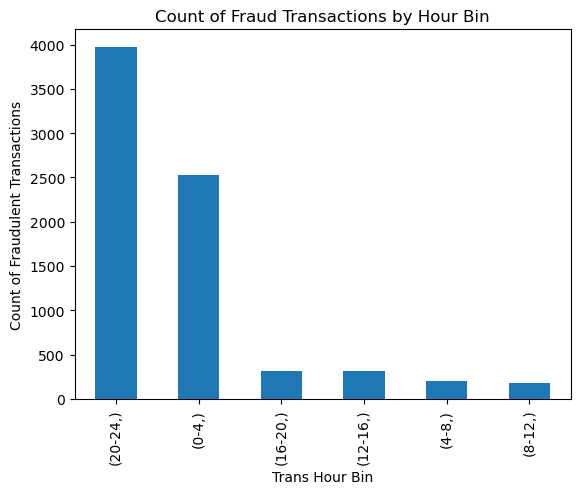

In [23]:
# bar chart to see the count of fraud transactions by hour bin
df[df['is_fraud']==1][['trans_hour_bin']].value_counts().plot(kind='bar')
plt.title('Count of Fraud Transactions by Hour Bin')
plt.xlabel('Trans Hour Bin')
plt.ylabel('Count of Fraudulent Transactions')
plt.show()

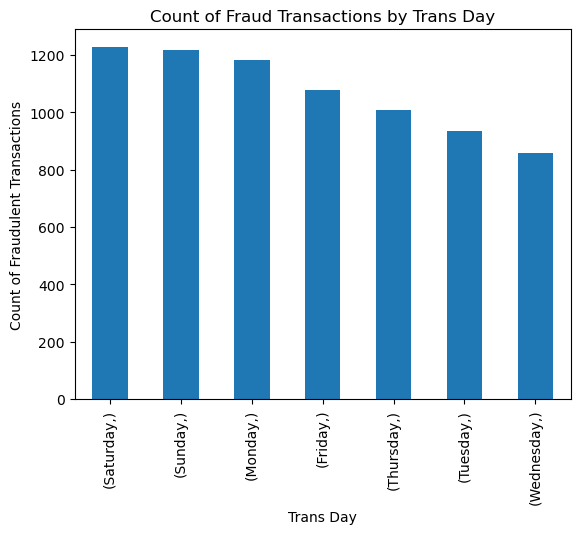

In [24]:
# bar chart to see the count of fraud transactions by day of the week
df[df['is_fraud']==1][['trans_day_name']].value_counts().plot(kind='bar')
plt.title('Count of Fraud Transactions by Trans Day')
plt.xlabel('Trans Day')
plt.ylabel('Count of Fraudulent Transactions')
plt.show()

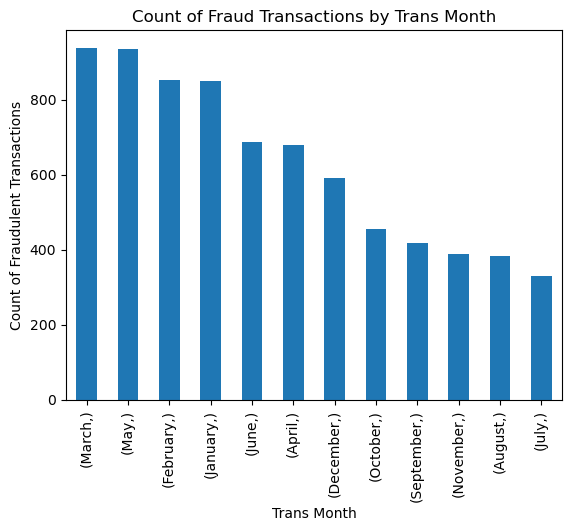

In [25]:
# bar chart to see the count of fraud transactions by month
df[df['is_fraud']==1][['trans_month']].value_counts().plot(kind='bar')
plt.title('Count of Fraud Transactions by Trans Month')
plt.xlabel('Trans Month')
plt.ylabel('Count of Fraudulent Transactions')
plt.show()

/var/folders/4p/rmrxtvt936v30345zcy84nw40000gn/T/ipykernel_58017/1203156533.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_bins_day = df[df['is_fraud'] == 1].pivot_table(index='trans_month', columns='trans_hour_bin', aggfunc='size')


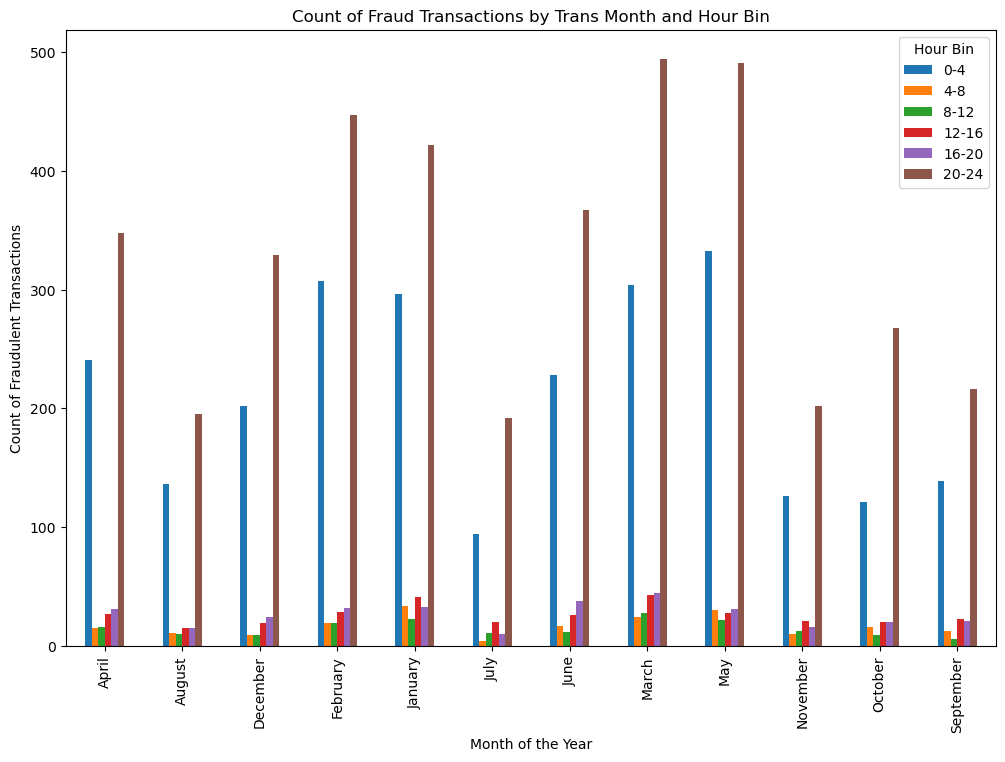

In [26]:
# filter out the non-fraud transactions and create a pivot table by month and hour bin
pivot_table_bins_day = df[df['is_fraud'] == 1].pivot_table(index='trans_month', columns='trans_hour_bin', aggfunc='size')

# bar chart to show the count of fraud transactions by month and hour bin
pivot_table_bins_day.plot(kind='bar', figsize=(12, 8))
plt.title('Count of Fraud Transactions by Trans Month and Hour Bin')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Fraudulent Transactions')
plt.legend(title='Hour Bin')
plt.show()

In [27]:
# Filter out non-fraud transactions
df_fraud = df[df['is_fraud'] == 1]

# Group by year, category, and count the occurrences
fraud_counts = df_fraud.groupby(['trans_year', 'category']).size().unstack()
fraud_counts = fraud_counts.loc[:, fraud_counts.sum().sort_values(ascending=False).index]

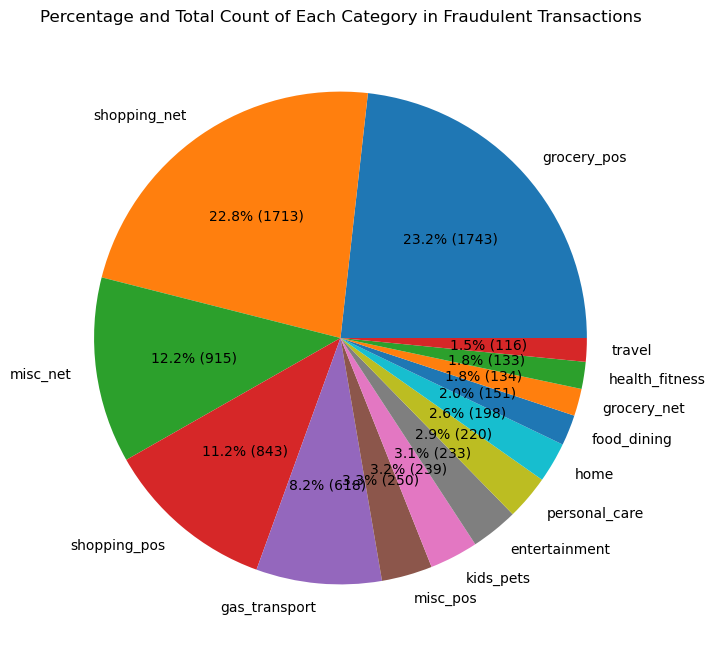

In [28]:
# pie chart to see percentage of fraudulent transactions and total count of each category
category_counts = df_fraud['category'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, (p/100)*sum(category_counts)))
plt.title('Percentage and Total Count of Each Category in Fraudulent Transactions')
plt.show()

In [59]:
# df to categorize by gender and category 
df_cat = df[['gender','category']]
df_cat.value_counts()

gender  category      
F       gas_transport     72667
        shopping_pos      67831
        grocery_pos       65412
        home              65279
        kids_pets         62877
M       gas_transport     58992
        grocery_pos       58226
        home              57836
F       shopping_net      55335
        personal_care     55227
M       kids_pets         50158
        shopping_pos      48841
F       food_dining       48389
        entertainment     48189
M       entertainment     45825
F       health_fitness    45244
M       food_dining       43072
F       misc_pos          42378
M       shopping_net      42208
        health_fitness    40635
        misc_pos          37277
F       misc_net          35639
M       personal_care     35531
        misc_net          27648
F       grocery_net       25274
M       travel            20385
        grocery_net       20178
F       travel            20122
Name: count, dtype: int64

In [60]:
# use the label encoder to encode categorical columns
le = LabelEncoder()
cols = ['gender', 'category']
for col in cols:
    df_cat[col] = le.fit_transform(df_cat[col])

df_cat

/var/folders/4p/rmrxtvt936v30345zcy84nw40000gn/T/ipykernel_58017/748438112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])
/var/folders/4p/rmrxtvt936v30345zcy84nw40000gn/T/ipykernel_58017/748438112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])


,gender,category
0,0,8
1,0,4
2,1,0
3,1,2
4,1,9
...,...,...
1296670,1,0
1296671,1,1
1296672,1,1
1296673,1,1


In [62]:
# add amount, is_fraud, and zip columns to the categorical df and 
df_cat[['amt','is_fraud', 'zip']] = df[['amt','is_fraud', 'zip']]
df_cat

/var/folders/4p/rmrxtvt936v30345zcy84nw40000gn/T/ipykernel_58017/4131293471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[['amt','is_fraud', 'zip']] = df[['amt','is_fraud', 'zip']]


,gender,category,amt,is_fraud,zip
0,0,8,4.97,0,28654
1,0,4,107.23,0,99160
2,1,0,220.11,0,83252
3,1,2,45.00,0,59632
4,1,9,41.96,0,24433
...,...,...,...,...,...
1296670,1,0,15.56,0,84735
1296671,1,1,51.70,0,21790
1296672,1,1,105.93,0,88325
1296673,1,1,74.90,0,57756


In [63]:
# filter by fraudulent transactions
df_cat_fraud = df_cat[df_cat['is_fraud'] == 1]
df_cat_fraud

,gender,category,amt,is_fraud,zip
2449,1,4,281.06,1,28611
2472,0,2,11.52,1,78208
2523,0,4,276.31,1,78208
2546,1,2,7.03,1,28611
2553,0,4,275.73,1,78208
...,...,...,...,...,...
1295399,0,11,977.01,1,32960
1295491,0,11,1210.91,1,32960
1295532,1,2,10.24,1,70726
1295666,0,2,21.69,1,79759


In [64]:
#group df by gender, category, and zip and sum the amount and merge city_pop column
df_cat_fraud = df_cat_fraud.groupby(['gender','category','zip']).agg({'amt': 'sum'}).reset_index()
df_cat_fraud = df_cat_fraud.merge(df[['zip', 'city_pop']].drop_duplicates(), on='zip', how='left')
df_cat_fraud = df_cat_fraud.sort_values(by=['amt', 'city_pop'], ascending=[False, True])
df_cat_fraud


,gender,category,zip,amt,city_pop
3483,1,11,5654,8359.10,970
1799,0,11,75246,8230.28,1263321
3684,1,11,55606,8121.92,272
3781,1,11,82936,7913.70,49
3463,1,11,1843,7750.05,76383
...,...,...,...,...,...
2129,0,13,16839,1.91,489
4068,1,13,6444,1.51,370
4070,1,13,14479,1.18,275
4086,1,13,36775,1.18,800


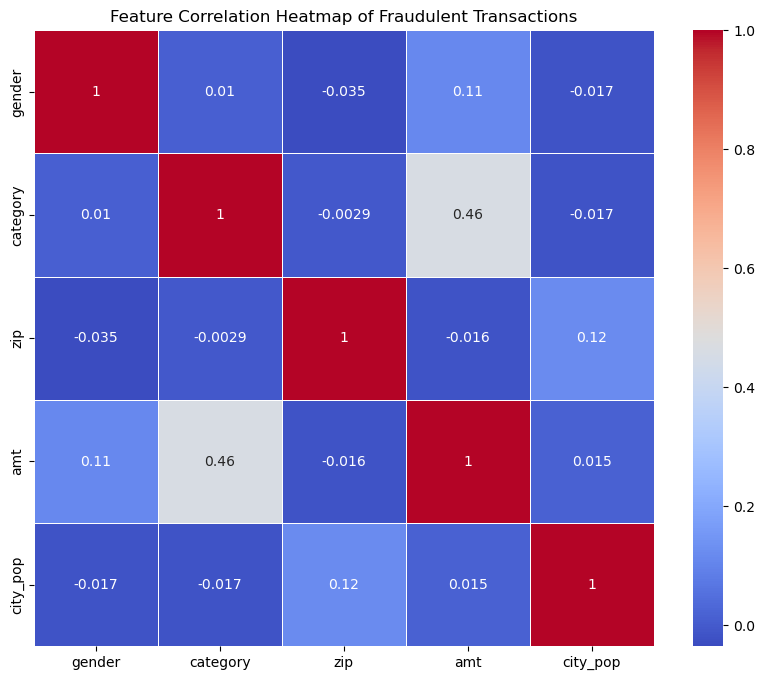

In [65]:
# correlation matrix to see the relationship between the features and create a Heatmap
correlation_matrix = df_cat_fraud.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Feature Correlation Heatmap of Fraudulent Transactions')
plt.show()

In [66]:
# merge df with lat and log to show the location of the fraudulent transactions
df_cat_fraud = df_cat_fraud.merge(df[['zip', 'lat', 'long']].drop_duplicates(), on='zip', how='left')
df_cat_fraud

,gender,category,zip,amt,city_pop,lat,long
0,1,11,5654,8359.10,970,44.1554,-72.4847
1,0,11,75246,8230.28,1263321,32.7948,-96.7697
2,1,11,55606,8121.92,272,47.8342,-90.0476
3,1,11,82936,7913.70,49,41.0552,-110.1603
4,1,11,1843,7750.05,76383,42.6911,-71.1605
...,...,...,...,...,...,...,...
4108,0,13,16839,1.91,489,41.0036,-78.1104
4109,1,13,6444,1.51,370,41.7918,-72.7188
4110,1,13,14479,1.18,275,43.2363,-78.3138
4111,1,13,36775,1.18,800,32.2844,-86.9920


In [67]:
# Create a map to show the location of the fraudulent transactions
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
heat_data = [[row['lat'], row['long']] for index, row in df_cat_fraud.iterrows()]
HeatMap(heat_data).add_to(m)
m

In [70]:
# Define the features and target for both fraud/non-fraud transactions
X = df_cat.drop(columns=['is_fraud'])
y = df_cat['is_fraud']


In [ ]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print('Training Dataset')
print(y_train.value_counts())

print('Testing Dataset')
print(y_test.value_counts())

Training Dataset
is_fraud
0    966781
1      5725
Name: count, dtype: int64
Testing Dataset
is_fraud
0    322388
1      1781
Name: count, dtype: int64


In [ ]:
# random forest classifier model
rfc = RandomForestClassifier(n_estimators = 29, random_state=24,min_samples_leaf=4,max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=29,
                       random_state=24)

In [ ]:
# accuracy and train/test scores using random forest classifier
y_pred = rfc.predict(X_test)
# y_pred
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
train_score = rfc.score(X_train, y_train)
test_score = rfc.score(X_test, y_test)
print(f'Train Score: {train_score:.3f}, Test Score: {test_score:.3f}')

Accuracy: 0.997
Train Score: 0.997, Test Score: 0.997


In [ ]:
# kneighbors classifier model
kn= KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# accuracy and train/test scores using KNeighbors classifier
y_pred = kn.predict(X_test)
# y_pred
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
train_score = kn.score(X_train, y_train)
test_score = kn.score(X_test, y_test)
print(f'Train Score: {train_score:.3f}, Test Score: {test_score:.3f}')

Accuracy: 0.995
Train Score: 0.995, Test Score: 0.995


k: 1, Train/Test Score: 1.000/0.994
k: 3, Train/Test Score: 0.997/0.995
k: 5, Train/Test Score: 0.996/0.995
k: 7, Train/Test Score: 0.995/0.995
k: 9, Train/Test Score: 0.995/0.995
k: 11, Train/Test Score: 0.995/0.995
k: 13, Train/Test Score: 0.995/0.995
k: 15, Train/Test Score: 0.995/0.995
k: 17, Train/Test Score: 0.995/0.995
k: 19, Train/Test Score: 0.995/0.995


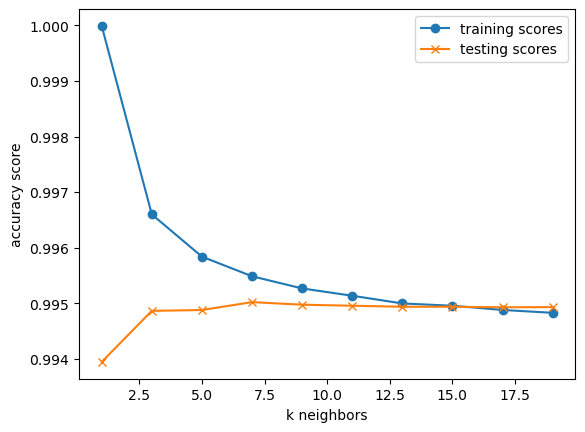

In [ ]:
# find the best k value for the KNeighbors classifier
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)
    train_score = kn.score(X_train, y_train)
    test_score = kn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}')
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()